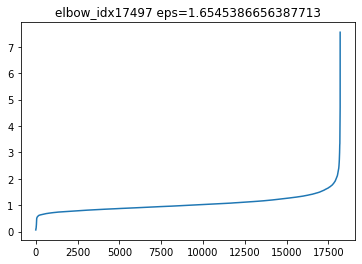

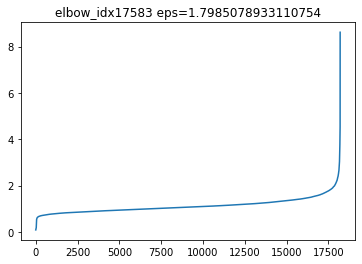

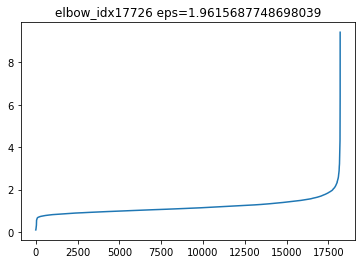

5.464141503145856  13.550615255882088


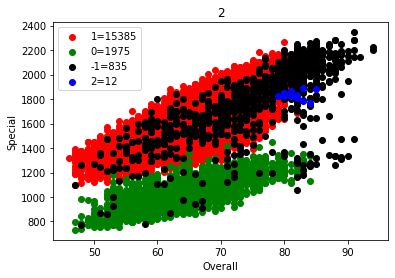

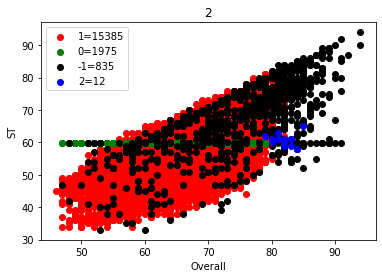

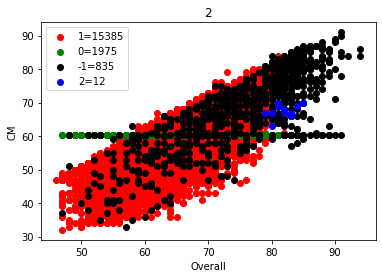

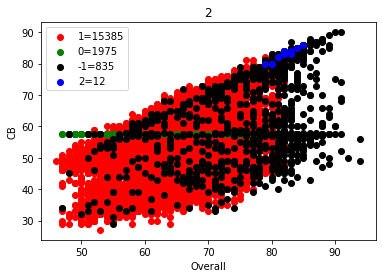

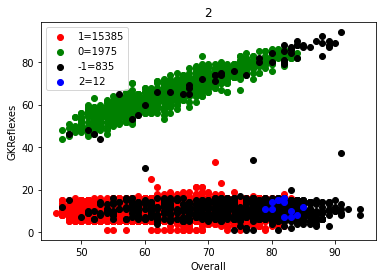

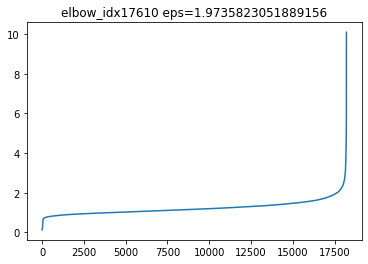

5.265017526999917  13.57210540516386


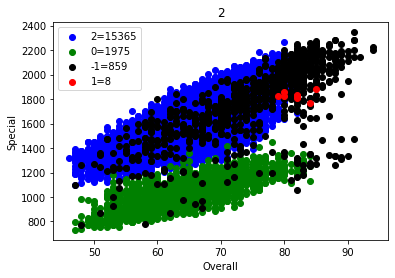

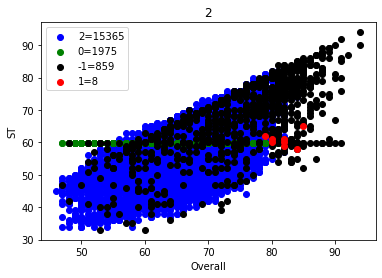

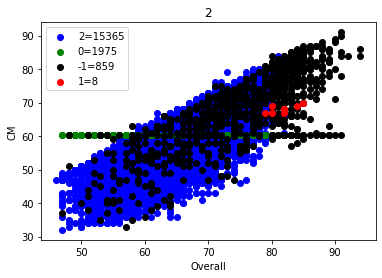

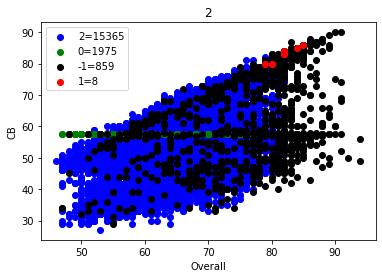

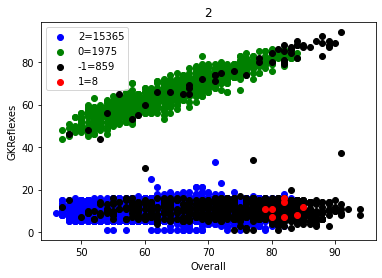

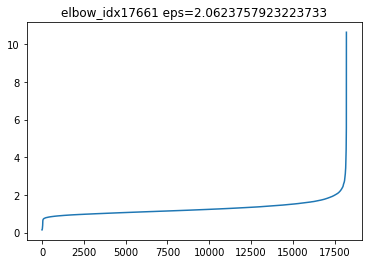

6.340930576387532  14.147718183691756


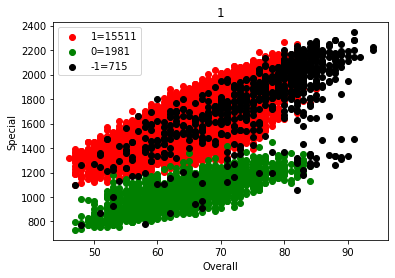

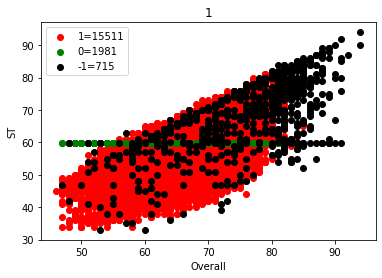

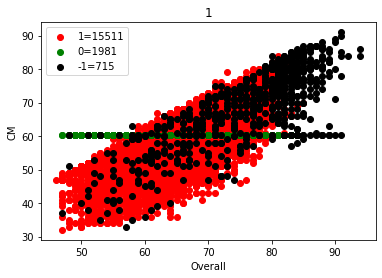

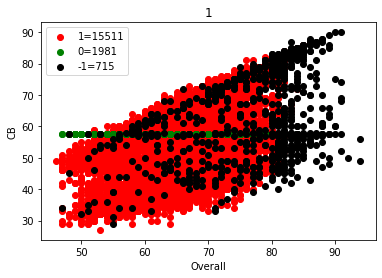

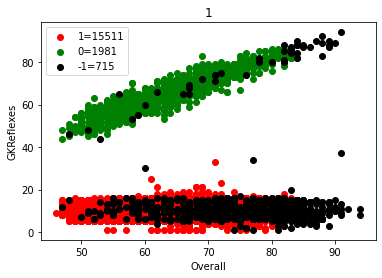

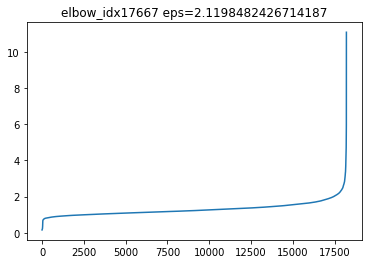

5.307298324093487  14.855516607935447


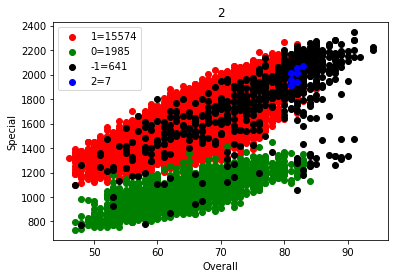

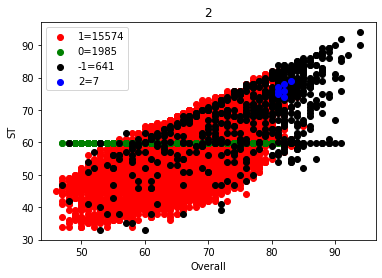

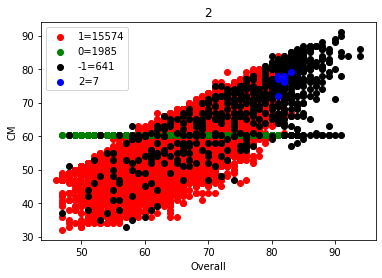

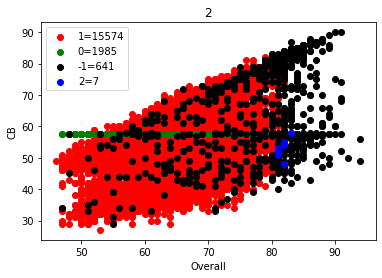

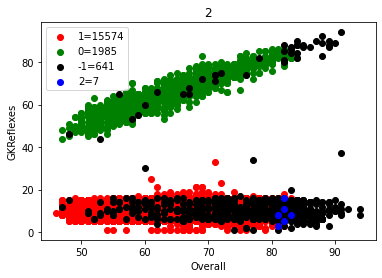

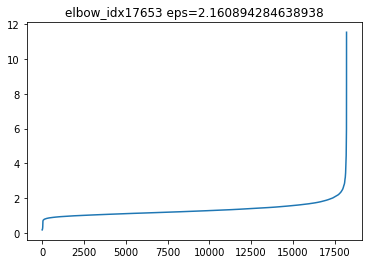

5.3119942607799535  14.855815176129257


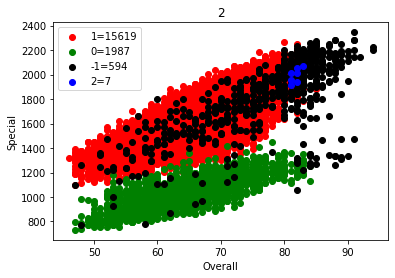

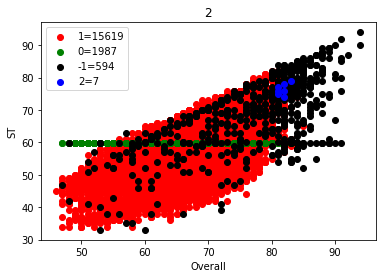

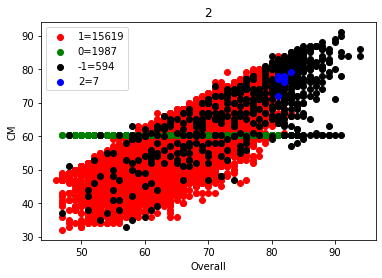

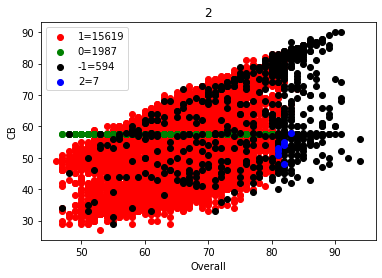

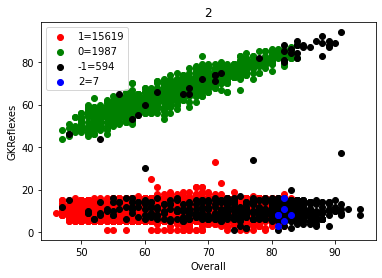

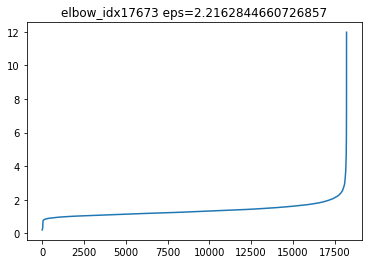

6.368230168119942  14.16913766699911


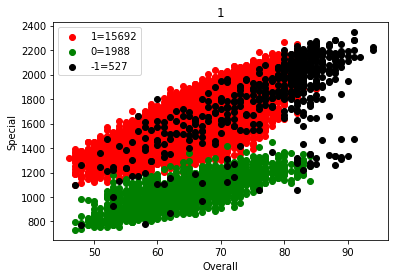

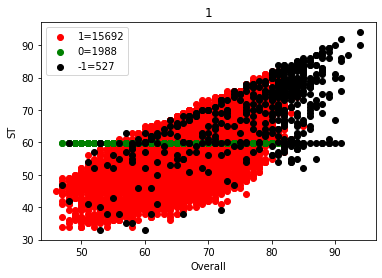

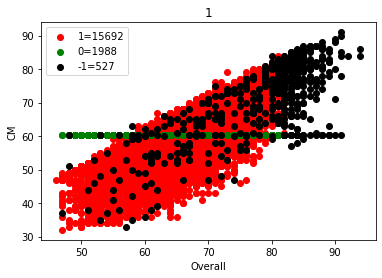

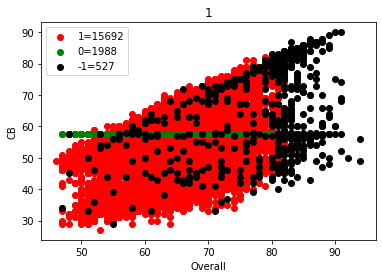

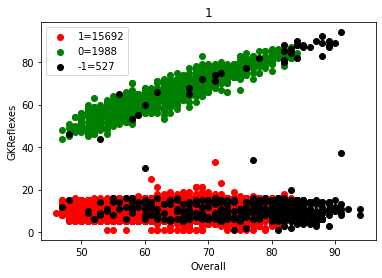

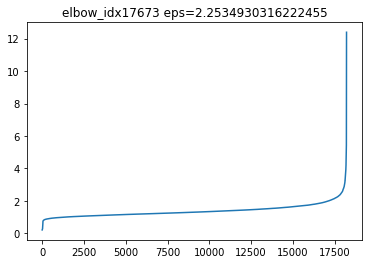

6.372126477553103  14.172676920413759


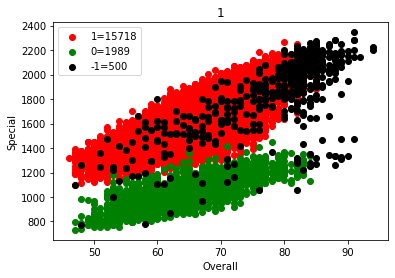

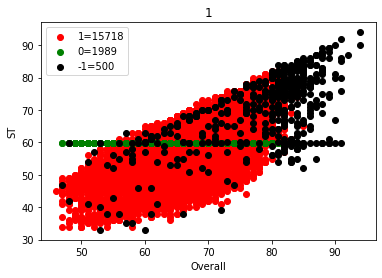

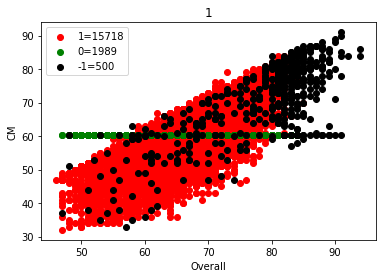

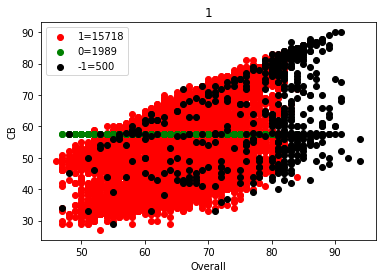

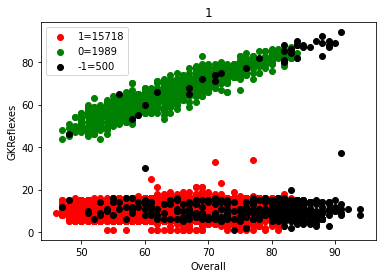

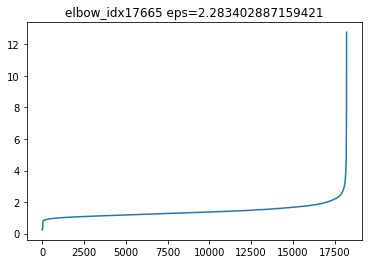

6.37549115745567  14.174822158842137


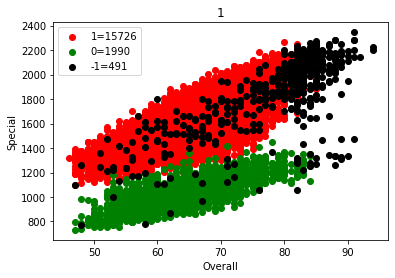

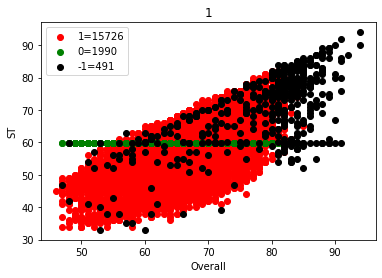

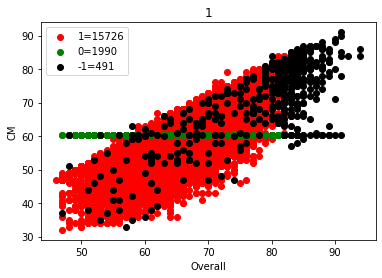

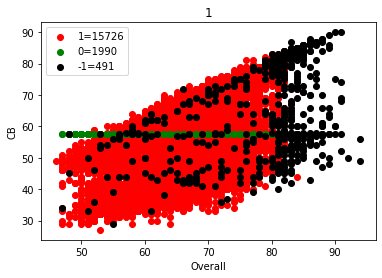

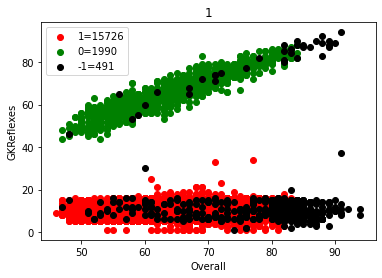

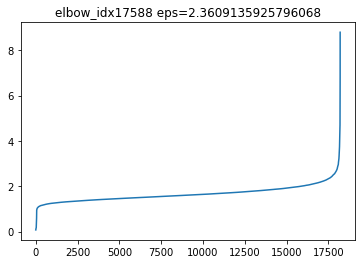

4.304496458878329  14.160519976536555


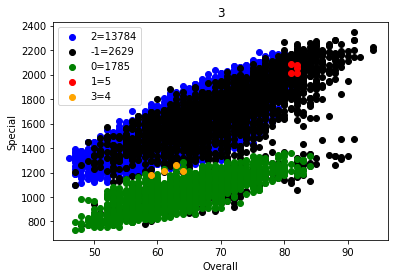

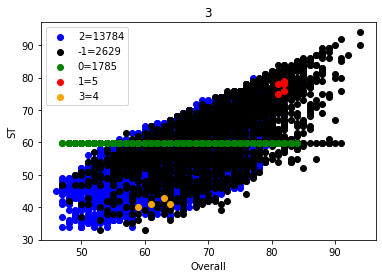

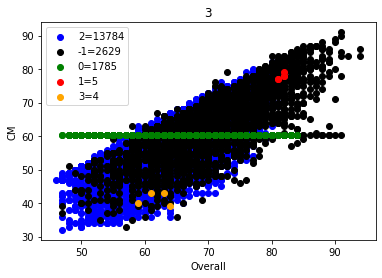

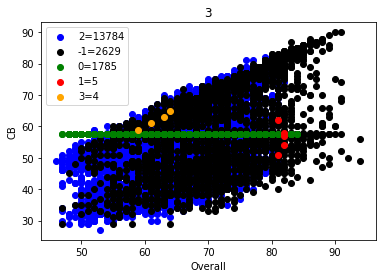

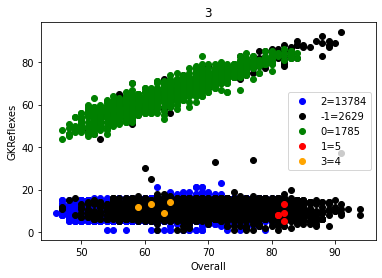

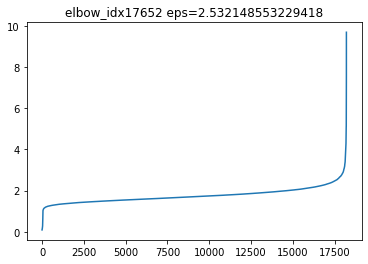

4.370216173783206  12.897003991659227


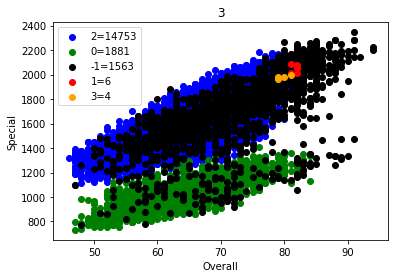

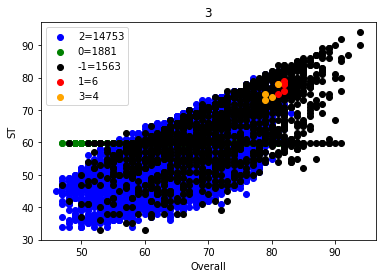

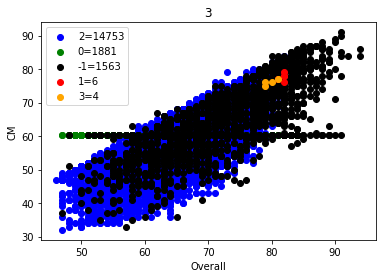

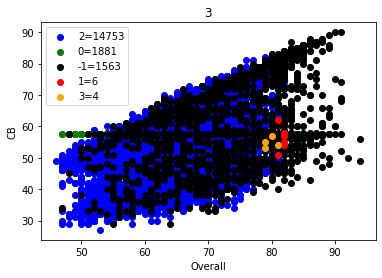

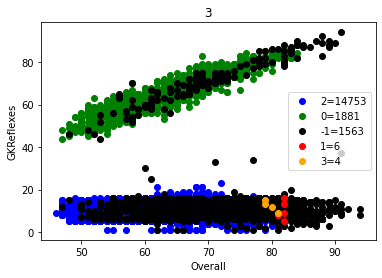

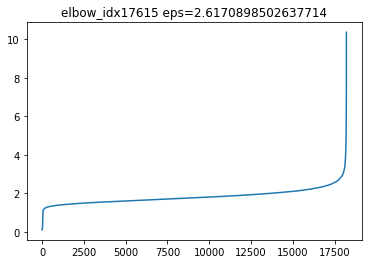

6.268844620841877  14.11847492717233


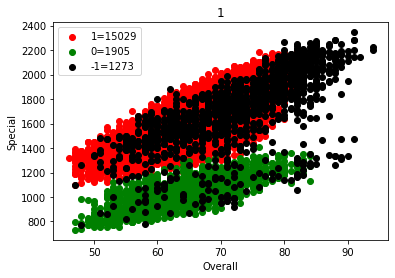

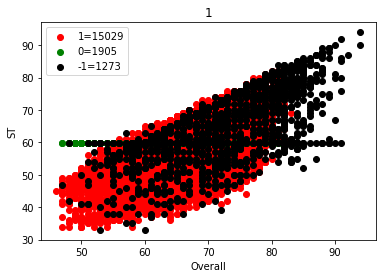

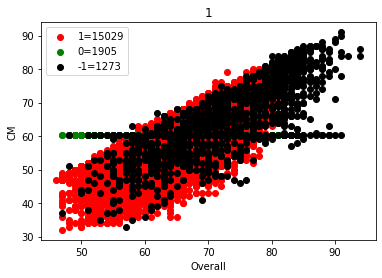

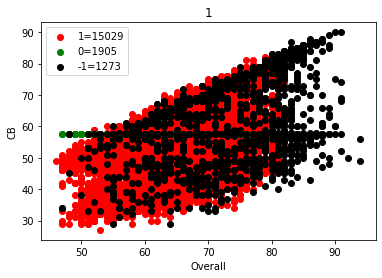

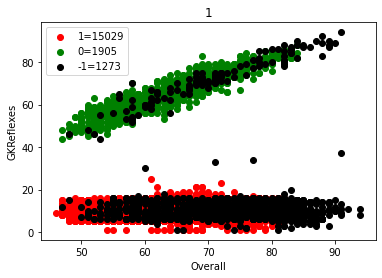

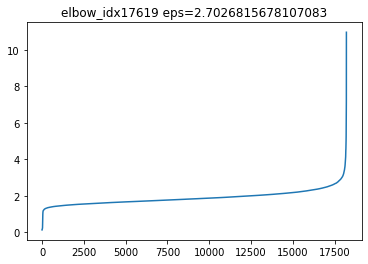

6.292684845619275  14.129999086647807


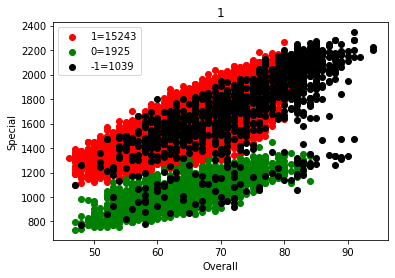

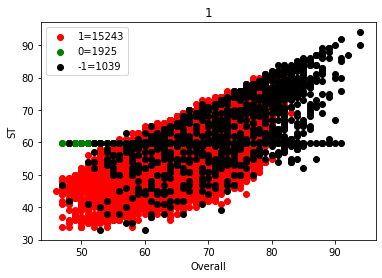

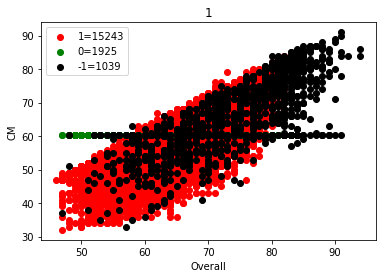

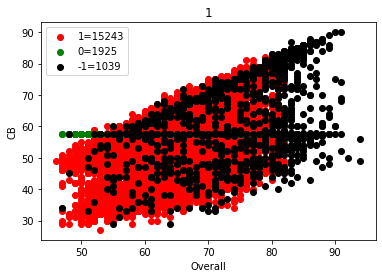

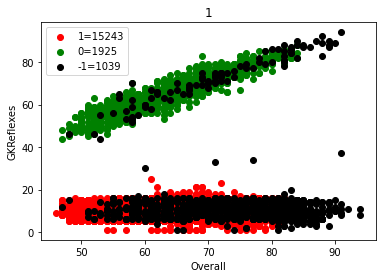

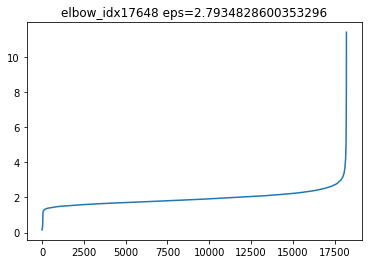

6.3207651972092656  14.147089137065969


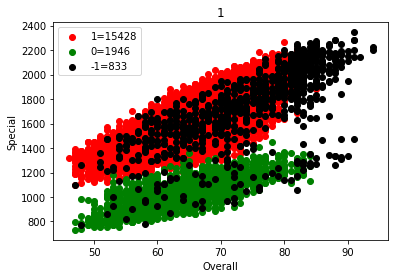

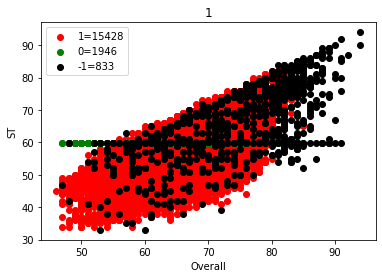

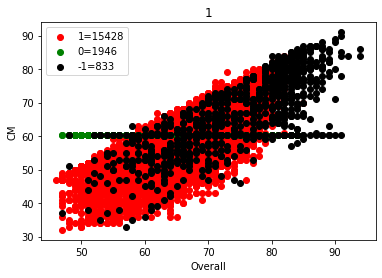

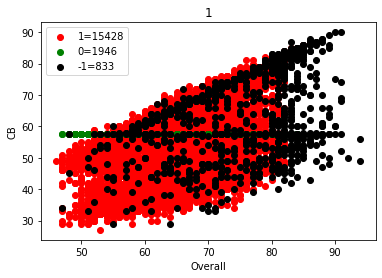

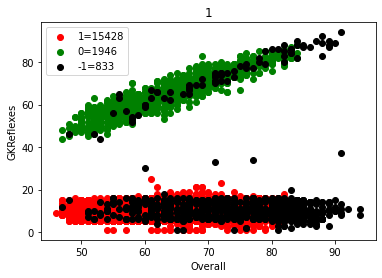

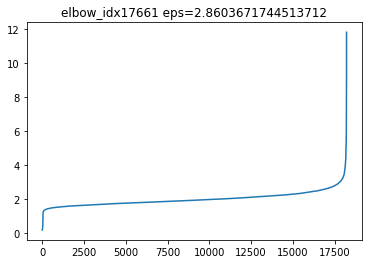

6.34264724719846  14.159161815661763


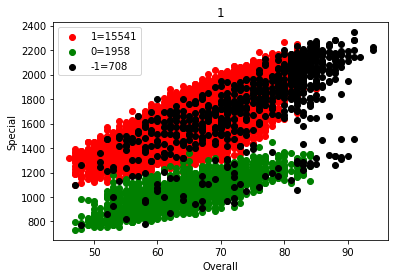

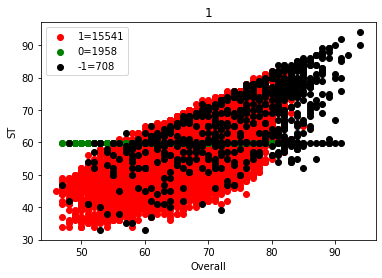

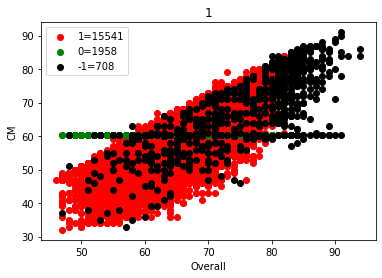

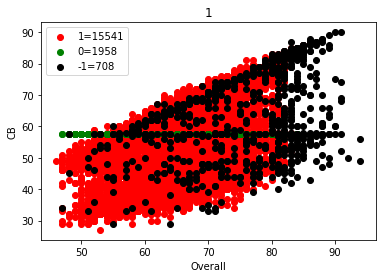

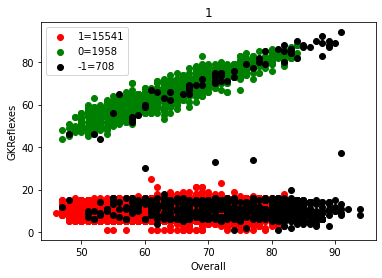

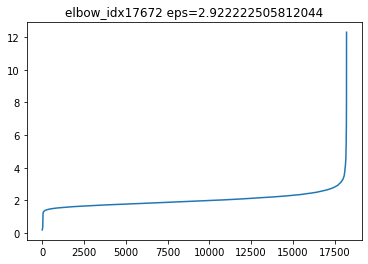

6.355814377480261  14.169198038213263


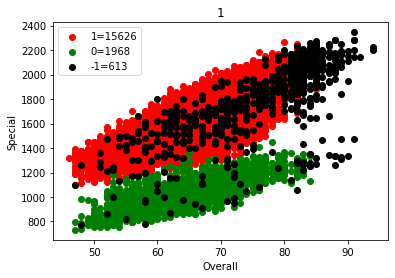

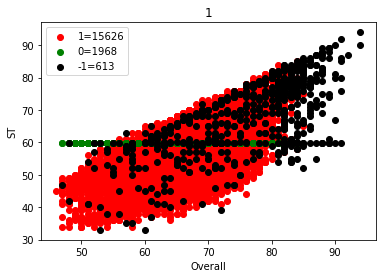

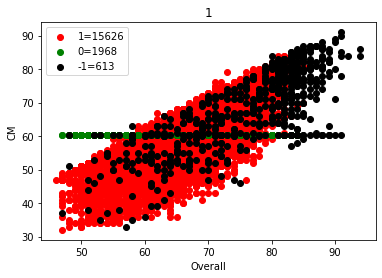

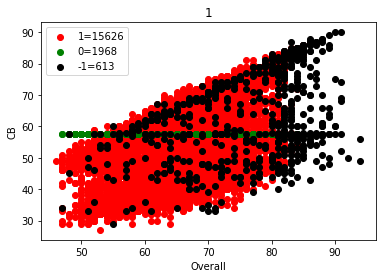

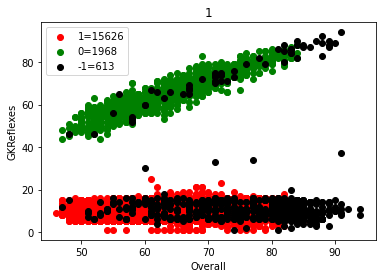

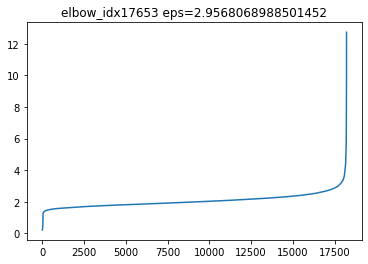

6.362209269281827  14.175338284699208


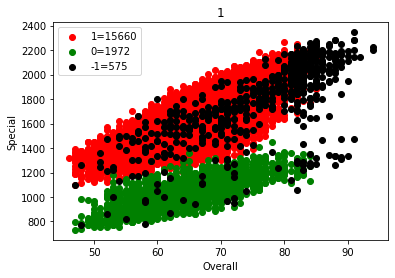

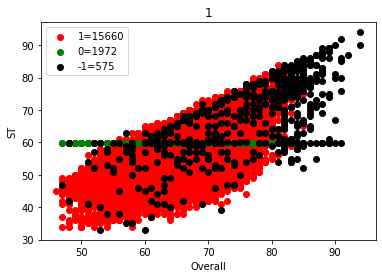

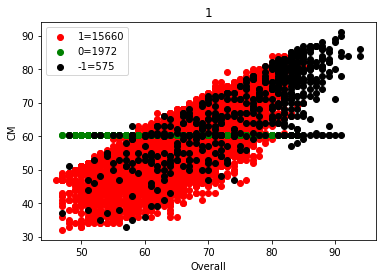

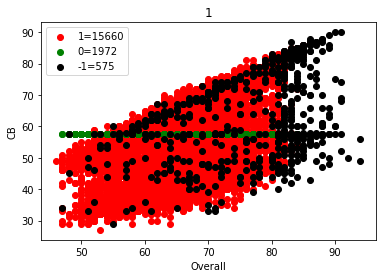

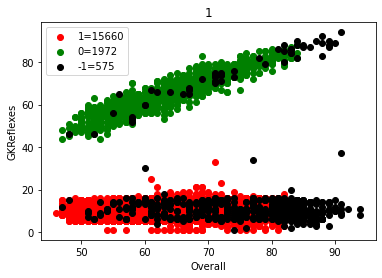

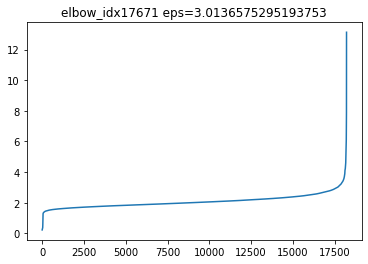

6.37159084628496  14.180349293233173


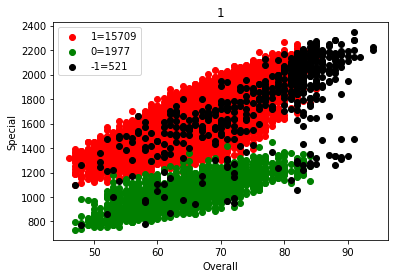

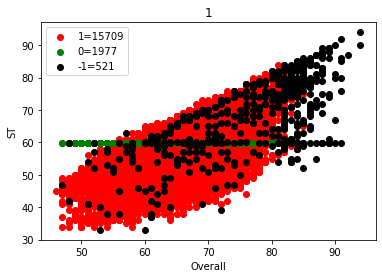

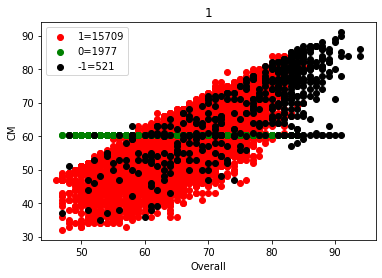

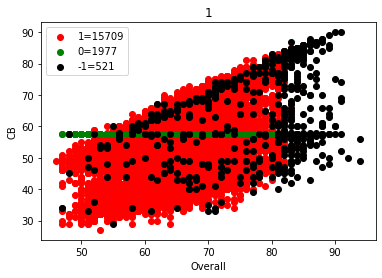

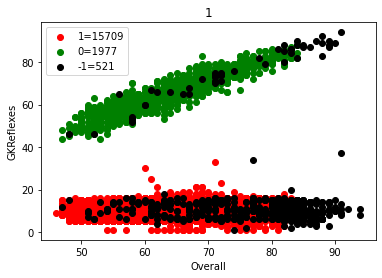

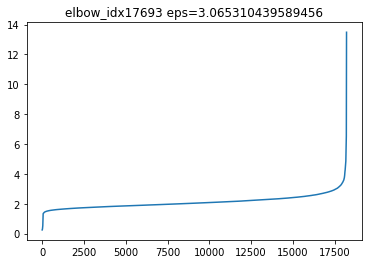

6.377663252921376  14.183270628186815


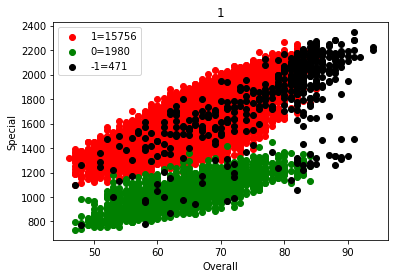

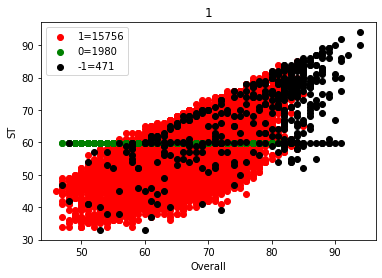

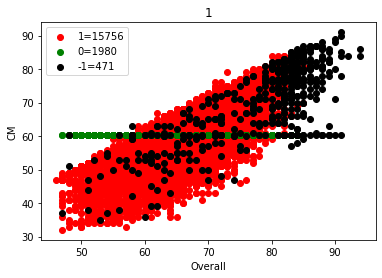

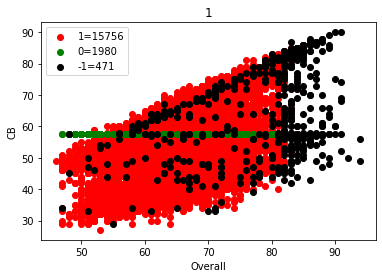

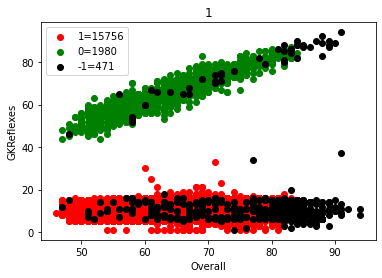

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataset = pd.read_csv('../football_data.csv')

toKeep = np.array([3, 7, 8, 11, 12, 13, 15, 16, 17, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88])
X = dataset.iloc[:,toKeep].values
header = dataset.iloc[:,toKeep].columns


row_length = X.shape[0]
col_length = X.shape[1]
# print(row_length)
# print(col_length)

overview_value_wage_arr = [3,4,X.shape[1]-1]
overview_value_wage_arr = np.array(overview_value_wage_arr)

'''
Removing Euro, Million, and K sign from wage and values
'''
print("Removing Euro, Million, and K sign from wage and values.")
for j in overview_value_wage_arr:
    for i in range(row_length):
        if type(X[i,j]) is not float:
            last_char = X[i,j][-1]
            if last_char == 'M':
                X[i,j] = 1000000*float(X[i,j][1:-1])
            elif last_char == 'K':
                X[i,j] = 1000*float(X[i,j][1:-1])
            else:
                X[i,j]=0

'''
Extracting year from date
'''
print("Extracting year from date.")
for j in range(10,12):
    for i in range(row_length):
        if type(X[i,j]) is not float:
            year = X[i,j][-4:]
            year = float(year)
            X[i,j] = year

'''
Getting height in inches
'''
print("Getting height in inches.")
for i in range (row_length):
    if type(X[i,12]) is not float:
        hh = X[i,12].split("'")
        ft = float(hh[0])
        ich = float(hh[1])
        ich = ich + 12*ft
        float(ich)
        X[i,12]=ich
      
'''
Extracting weight value by removing "lbs"
'''
print("Extracting weight value by removing lbs.")
for i in range(X.shape[0]):
    if type(X[i,13]) is not float:
        wgt = X[i,13][:-3]
        wgt = float(wgt)
        X[i,13] = wgt
        
'''
Converting all numeric data to float
'''
print("Converting all numeric data to float.")
for i in range(40,col_length-1):
    X[:,i].astype(float)

'''
Removing "+" signs if any
'''
print("Removing + signs if any.")
for j in range(14,40):
    for i in range (row_length):
        if type(X[i,j]) is not float:
            hh = X[i,j].split("+")
            fv = float(hh[0])
            sv = float(hh[1])
            X[i,j]=fv+sv

X=X.astype(float)

#%%
#for i in range(75):
#   print(np.isnan(X[:,i]).sum())

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
for j in range(X.shape[1]):
    imputer = imputer.fit(X[:, j:j+1])
    X[:, j:j+1] = imputer.transform(X[:, j:j+1])


#%%
temp=X
toKeep=np.array([])
for i in range(0,6):
    toKeep=np.append(toKeep,i)
for i in range(12,14):
    toKeep=np.append(toKeep,i)
toKeep=np.append(toKeep,[15,19,27,37])
for i in range(40,75):
    toKeep=np.append(toKeep,i)
toKeep=toKeep.astype(int)

X=X[:,toKeep]
header=header[toKeep]



#%%
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X2= sc_X.fit_transform(X)

#%%
#plt.scatter(X[:,0],X[:,1])
#plt.xlabel('Age')
#plt.ylabel('Overall')
#plt.show()

#plt.scatter(X[:,0],X[:,2])
#plt.xlabel('Age')
#plt.ylabel('Potential')
#plt.show()

#plt.scatter(X[:,12],X[:,13])
#plt.xlabel('Height')
#plt.ylabel('Weight')
#plt.show()

#plt.scatter(X[:,1],X[:,4])
#plt.xlabel('Overall')
#plt.ylabel('Wage')
#plt.show()

#plt.scatter(X[:,1],X[:,3])
#plt.xlabel('Overall')
#plt.ylabel('Value')
#plt.show()

#plt.scatter(X[:,1],X[:,74])
#plt.xlabel('Overall')
#plt.ylabel('Release Clause')
#plt.show()

#for i in range(14,74):
#    plt.scatter(X[:,i],X[:,3])
#    plt.xlabel(header[i])
#    plt.ylabel('Value')
#    plt.show()
#%%

def freq(labels):
    mp=dict()
    for i in labels:
        if i in mp.keys():
            mp[i]+=1
        else:
            mp[i]=1
    return [k for k, v in sorted(mp.items(),reverse=True, key=lambda item: item[1])]


#%%
def draw(labels,intraClass,interClass):
    
    mp=freq(labels)
    
    for arg in [5,8,10,11,45]:
        plt.figure()
        
        color=['black','green','red','blue','orange','yellow','pink']    

        for i in mp:
            plt.scatter(X[labels==i][:,1],X[labels==i][:,arg],color=color[i+1],label=str(i)+"="+str(np.sum(labels==i)))
            
        plt.xlabel(header[1])
        plt.ylabel(header[arg])
        plt.legend()
        plt.title(str(np.max(labels)))
        plt.show()
#%%
from sklearn.decomposition import PCA 
from sklearn.neighbors import NearestNeighbors
from kneebow.rotor import Rotor
from sklearn.cluster import DBSCAN 
from sklearn.metrics import pairwise 
stats=[]

for n_components in [10,20]:
    pca = PCA(n_components = n_components)
    X3= pca.fit_transform(X2) 
    
    for n_neighbors in range(5,15):
      
        neigh = NearestNeighbors(n_neighbors=n_neighbors)
        nbrs = neigh.fit(X3)
        distances, indices = nbrs.kneighbors(X3)
        distances=np.mean(distances,axis=1)
        distances = np.sort(distances, axis=0)
        
        plt.plot(distances)
        
        
        temp=np.append(indices[:,0:1],distances.reshape(distances.shape[0],1),axis=1)      
        rotor = Rotor()
        rotor.fit_rotate(temp)
        elbow_idx = rotor.get_elbow_index()
        
        plt.title("elbow_idx"+str(elbow_idx)+" eps=" + str(distances[elbow_idx]))
        plt.show()
        
        db_default = DBSCAN(eps = distances[elbow_idx], min_samples = n_neighbors).fit(X3) 
        labels = db_default.labels_ 
        
        if np.max(labels)>4:
            continue

        n_clusters=np.max(labels)+1
        
        intraClass=0
        interClass=0
        for i in range(n_clusters):
            intraClass+=np.mean(pairwise.pairwise_distances(X2[labels==i],metric='euclidean'))
            for j in range(i+1,n_clusters):
                interClass+=np.mean(pairwise.pairwise_distances(X2[labels==i],X2[labels==j],metric='euclidean'))
        intraClass=intraClass/n_clusters
        interClass=interClass/((n_clusters*(n_clusters-1))/2)
    
        stats.append([interClass/intraClass,interClass,intraClass,distances[elbow_idx],n_neighbors,n_components,n_clusters])

        print(str(intraClass)+"  "+str(interClass))
        draw(labels,intraClass,interClass)        
        
        
#%%
stats=sorted(stats,reverse=True)